In [1]:
!pip install yfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


In [69]:
import pandas as pd
import yfinance as yf              # a popular open source library to access the financial data available on Yahoo Finance
import matplotlib.pyplot as plt
import mplfinance as mpf           # a financial charting library of matplotlib
import seaborn as sns

**STEPS:**
2.   Read the daily confirmed cases and deaths into two dataframes can be found at this github page:


> a)	Confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"




  > b)	deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


3. Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level






In [30]:
# URLs for confirmed cases and deaths data of COVID-19
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into DataFrames
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)


In [31]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [32]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [33]:
# Sum confirmed cases and deaths of global Covid-19 for each date
confirmed_cases = confirmed_cases.iloc[:, 4:].sum()
confirmed_cases.name = 'Covid-19 confirmed cases'

deaths = deaths.iloc[:, 4:].sum()
deaths.name = 'Covid-19 deaths'

# Create a DataFrame that aggregates both confirmed cases and deaths
global_covid = pd.concat([confirmed_cases, deaths], axis=1)

# Convert index to datetime
global_covid.index = pd.to_datetime(global_covid.index)

# Rename the index column
global_covid.index.name = 'Date'

global_covid.head()

<ipython-input-33-53998a9f6ef2>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  global_covid.index = pd.to_datetime(global_covid.index)


,Covid-19 confirmed cases,Covid-19 deaths
Date,,
2020-01-22,557,17
2020-01-23,657,18
2020-01-24,944,26
2020-01-25,1437,42
2020-01-26,2120,56



4. Research a stock for each below that reflects the following industries (it will be used in the next step):

> a) Overall American Market

> b) Overall Canadian Market

> c) Travel sector

> d) The Real Estate sector

> e) Precious metals (Gold, Silver, Platinum, etc)

5. Use AlphaVantage or other website to get the daily high and low prices for your selected stocks


In [63]:
# Define the stocks and their symbols
stocks = {
    'S&P/TSX Composite index': '^GSPTSE'    # representing roughly 70% of the total market capitalization on the Toronto Stock Exchange
    # 'Pfizer': 'PFE',                         # an American multinational pharmaceutical corporation that developed the Covid-19 vaccine
    # 'Canadian Tire': 'CTC.TO',                # Canadian Tire, a stock of Canada Market, Toronto Stock Exchange
    # 'Air Canada': 'AC.TO',                    # Air Canada, Toronto Stock Exchange - Travel sector
    # 'Choice Properties REIT': 'CHP-UN.TO',    # Choice Properties REIT, Toronto Stock Exchange - The Real Estate sector
    # 'SPDR Gold Trust ETF': 'GLD'              # SPDR Gold Trust ETF - Precious metals
}

# Define the date range (from start_date to the date before end_date)
start_date = '2020-02-01'
end_date = '2021-07-01'

# Create an empty list to store data
stock_data = pd.DataFrame()

# Loop through the stocks
for stock_name, symbol in stocks.items():
    # Fetch historical stock data using yfinance
    data = yf.download(symbol, start=start_date, end=end_date)

    # Add 'Stock' and 'Symbol' columns
    data['Stock'] = stock_name
    data['Symbol'] = symbol

    # Reset index to include 'Date' as a column
    data.reset_index(inplace=True)

    # Append data to the DataFrame
    stock_data = pd.concat([stock_data, data[['Date', 'Stock', 'Symbol', 'High', 'Low', 'Open', 'Close']]])

# Reset the columns if any level still exists
stock_data.columns = ['Date', 'Stock', 'Symbol', 'High', 'Low', 'Open', 'Close']

# Set the 'Date' column as the index
stock_data.set_index('Date', inplace=True)

# Save the DataFrame to a CSV file
stock_data.to_csv('stock_data.csv', index=True)

# Display the DataFrame
stock_data


[*********************100%***********************]  1 of 1 completed


,Stock,Symbol,High,Low,Open,Close
Date,,,,,,
2020-02-03,S&P/TSX Composite index,^GSPTSE,17441.599609,17351.000000,17351.000000,17379.800781
2020-02-04,S&P/TSX Composite index,^GSPTSE,17548.800781,17493.800781,17504.599609,17512.699219
2020-02-05,S&P/TSX Composite index,^GSPTSE,17674.000000,17606.099609,17629.400391,17651.599609
2020-02-06,S&P/TSX Composite index,^GSPTSE,17758.500000,17670.599609,17686.099609,17757.500000
2020-02-07,S&P/TSX Composite index,^GSPTSE,17716.699219,17633.000000,17705.400391,17655.500000
...,...,...,...,...,...,...
2021-06-24,S&P/TSX Composite index,^GSPTSE,20257.800781,20176.400391,20241.400391,20215.099609
2021-06-25,S&P/TSX Composite index,^GSPTSE,20240.199219,20146.400391,20230.800781,20230.300781
2021-06-28,S&P/TSX Composite index,^GSPTSE,20273.599609,20113.500000,20273.599609,20145.300781


Step 5: Combine COVID-19 and Stock Market Data
• Append the stock market data to the COVID-19 aggregated dataframe.
• Align stock prices and COVID-19 data by date to allow for meaningful comparisons.

In [64]:
# Join stock_data & global_covid dataframe
stock_covid = stock_data.join(global_covid)

stock_covid

,Stock,Symbol,High,Low,Open,Close,Covid-19 confirmed cases,Covid-19 deaths
Date,,,,,,,,
2020-02-03,S&P/TSX Composite index,^GSPTSE,17441.599609,17351.000000,17351.000000,17379.800781,19887,428
2020-02-04,S&P/TSX Composite index,^GSPTSE,17548.800781,17493.800781,17504.599609,17512.699219,23899,494
2020-02-05,S&P/TSX Composite index,^GSPTSE,17674.000000,17606.099609,17629.400391,17651.599609,27644,566
2020-02-06,S&P/TSX Composite index,^GSPTSE,17758.500000,17670.599609,17686.099609,17757.500000,30806,636
2020-02-07,S&P/TSX Composite index,^GSPTSE,17716.699219,17633.000000,17705.400391,17655.500000,34400,721
...,...,...,...,...,...,...,...,...
2021-06-24,S&P/TSX Composite index,^GSPTSE,20257.800781,20176.400391,20241.400391,20215.099609,180507231,3929883
2021-06-25,S&P/TSX Composite index,^GSPTSE,20240.199219,20146.400391,20230.800781,20230.300781,180924899,3939117
2021-06-28,S&P/TSX Composite index,^GSPTSE,20273.599609,20113.500000,20273.599609,20145.300781,181932050,3959315


Step 6: Create Visualizations
Using Matplotlib (and optionally Seaborn or Plotly for advanced graphs), create the following visualizations:
1. Line Graphs:
  - Show trends in global confirmed cases and deaths over time.
  - Plot stock prices (high and low) over time for each selected stock.

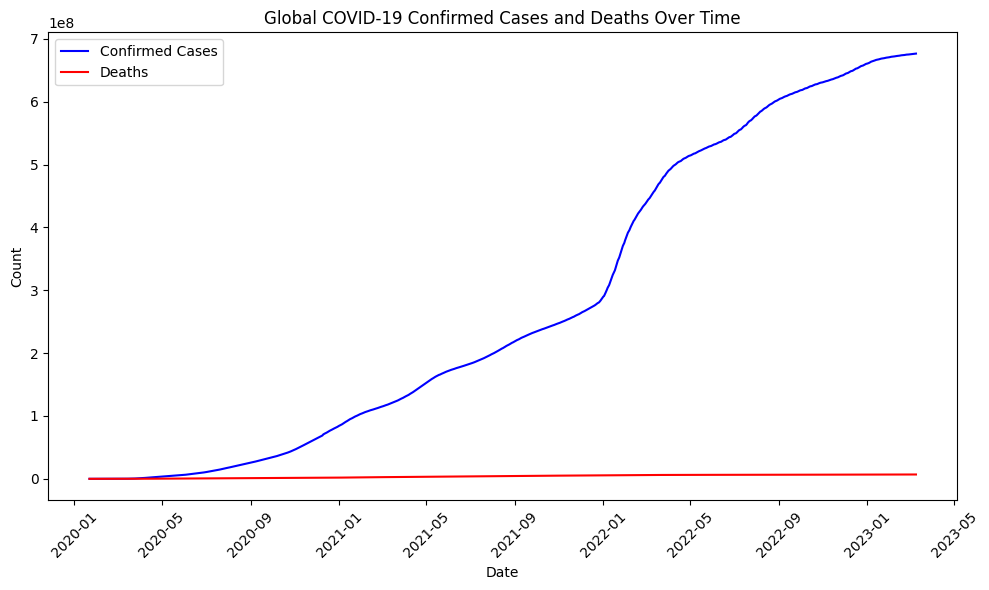

In [66]:
# Line graph for global COVID-19 confirmed cases and deaths over time
plt.figure(figsize=(10, 6))
plt.plot(global_covid.index, global_covid['Covid-19 confirmed cases'], label='Confirmed Cases', color='blue')
plt.plot(global_covid.index, global_covid['Covid-19 deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Confirmed Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

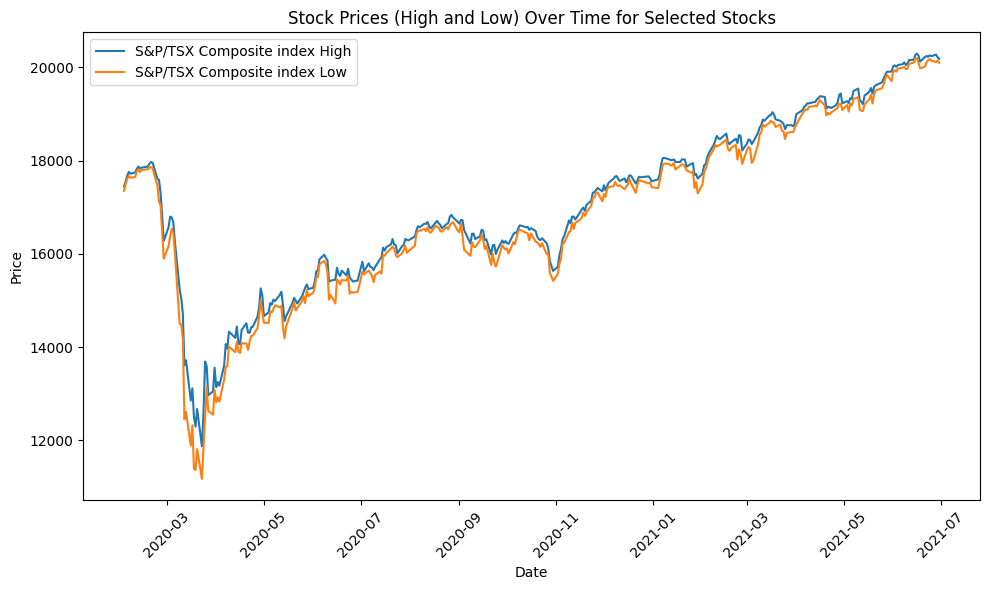

In [67]:
# Line graph for stock prices (High and Low) for each stock
plt.figure(figsize=(10, 6))
for stock in stocks.keys():
    stock_subset = stock_data[stock_data['Stock'] == stock]
    plt.plot(stock_subset.index, stock_subset['High'], label=f'{stock} High')
    plt.plot(stock_subset.index, stock_subset['Low'], label=f'{stock} Low')

plt.title('Stock Prices (High and Low) Over Time for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Histograms:
  - Display the distribution of daily changes in stock prices (e.g., daily highs minus daily lows).

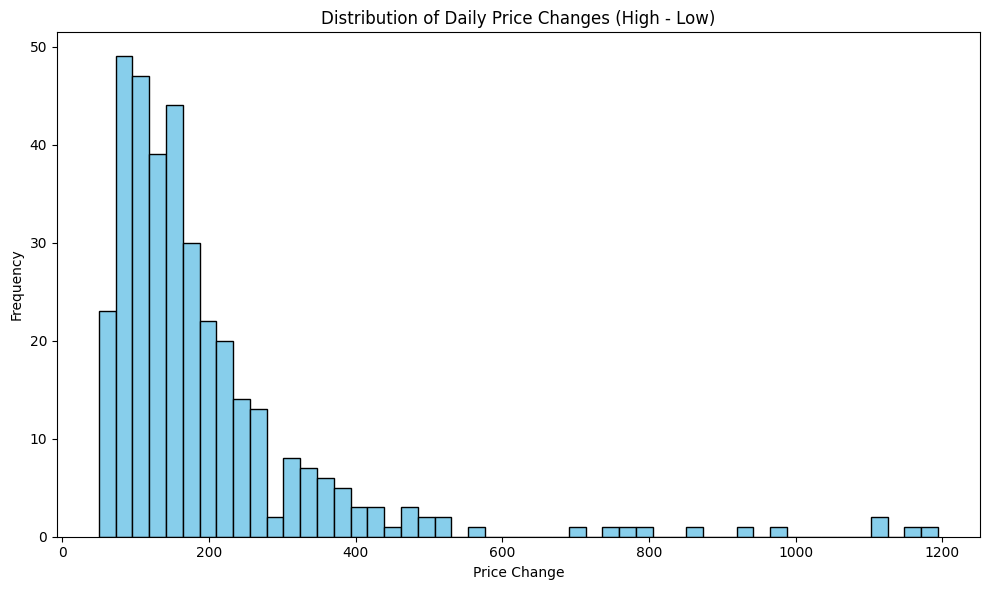

In [68]:
# Calculate daily price change (High - Low)
stock_data['Price Change'] = stock_data['High'] - stock_data['Low']

# Plot histogram for daily price changes
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Price Change'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Price Changes (High - Low)')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

3. Boxplots:
  - Compare the variability of stock prices across the selected industries.

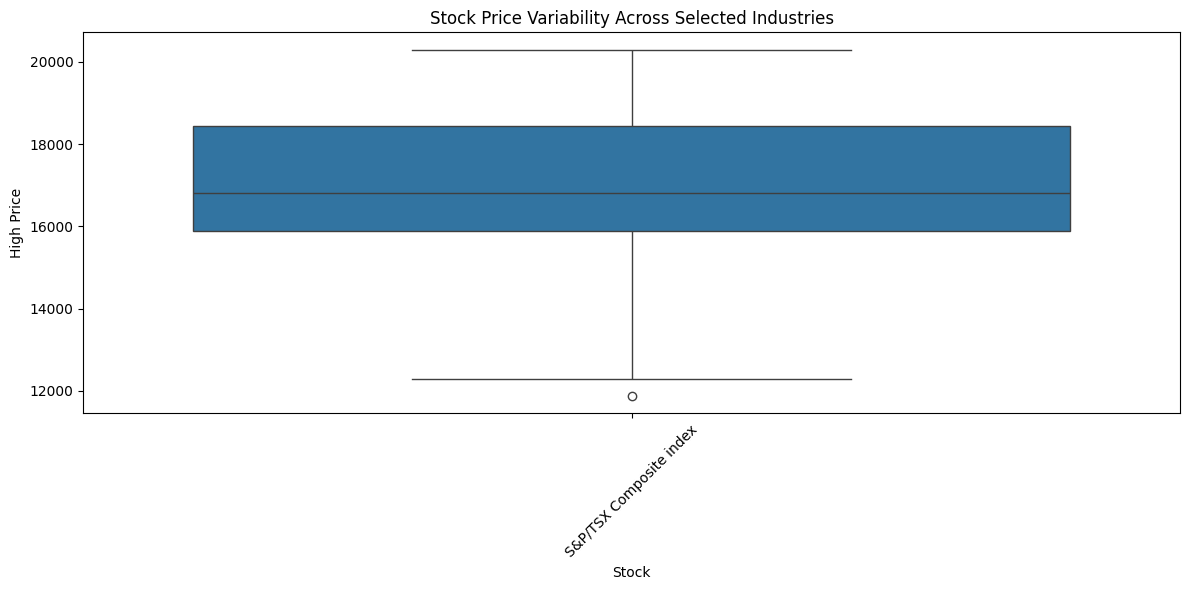

In [70]:
# Boxplot for variability in stock prices (using 'High' prices as an example)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stock', y='High', data=stock_data)
plt.title('Stock Price Variability Across Selected Industries')
plt.xlabel('Stock')
plt.ylabel('High Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Scatter Plots:
  - Create scatter plots to visualize potential correlations between global COVID-19 cases and stock prices for selected industries.

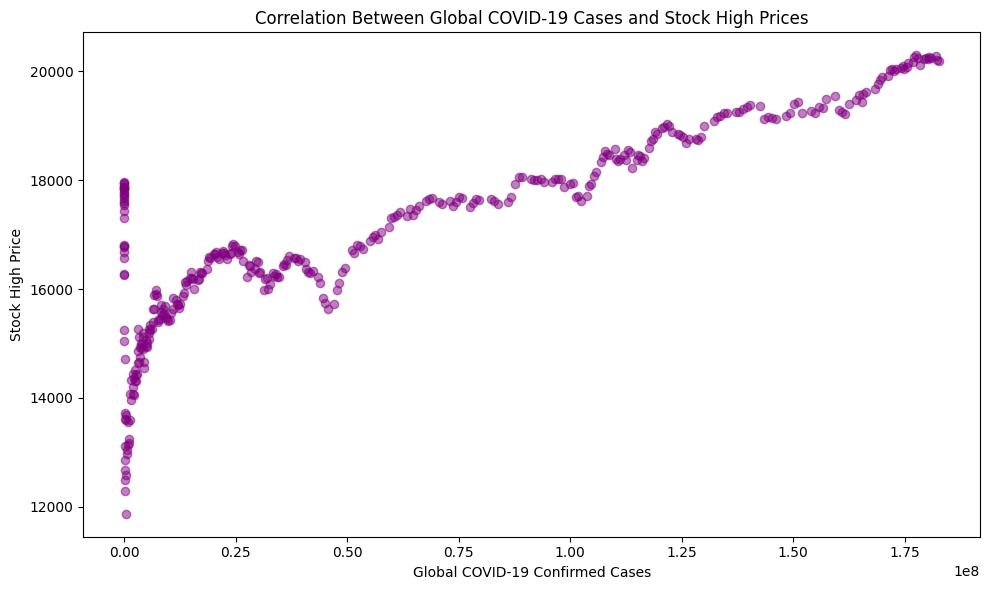

In [73]:
# Ensure 'Date' column is datetime format in both DataFrames
global_covid.index = pd.to_datetime(global_covid.index)
stock_data.index = pd.to_datetime(stock_data.index)

# Merge the stock data and global COVID-19 data on the Date index
merged_data = pd.merge(stock_data[['Stock', 'High']], global_covid[['Covid-19 confirmed cases']],
                       left_index=True, right_index=True, how='inner')

# Scatter plot for global COVID-19 confirmed cases vs stock prices (e.g., High price)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Covid-19 confirmed cases'], merged_data['High'], alpha=0.5, color='purple')
plt.title('Correlation Between Global COVID-19 Cases and Stock High Prices')
plt.xlabel('Global COVID-19 Confirmed Cases')
plt.ylabel('Stock High Price')
plt.tight_layout()
plt.show()

5. Bar Charts:
  - Compare the average stock price movements during different phases of the pandemic (e.g., initial outbreak, peak, recovery).

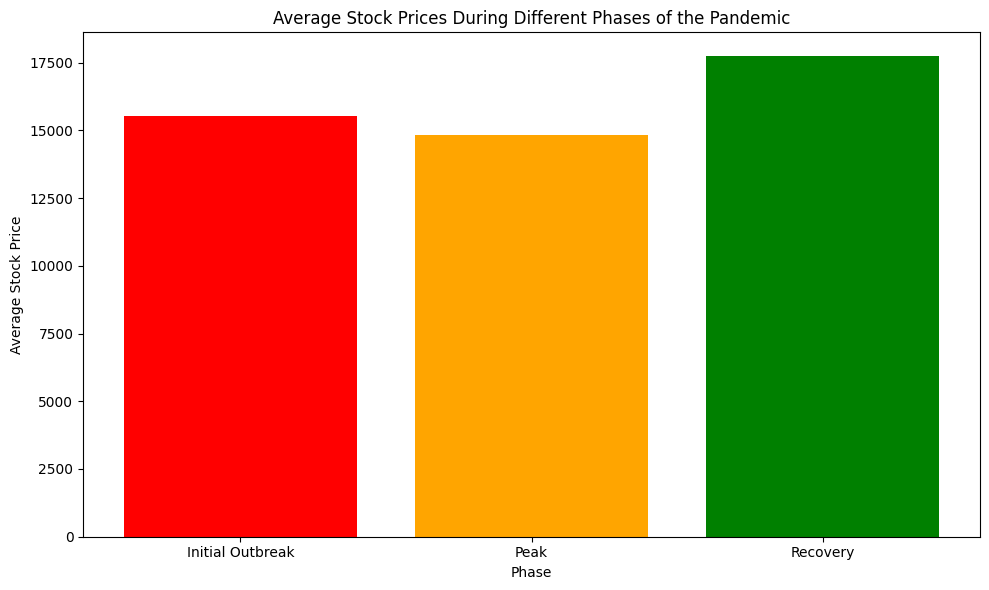

In [75]:
# Define date ranges for the different phases
initial_outbreak_start = pd.to_datetime('2020-01-22')
initial_outbreak_end = pd.to_datetime('2020-03-31')

peak_start = pd.to_datetime('2020-04-01')
peak_end = pd.to_datetime('2020-06-30')

recovery_start = pd.to_datetime('2020-07-01')
recovery_end = pd.to_datetime('2021-07-01')

# Ensure 'Date' column is in datetime format for stock_data
stock_data.index = pd.to_datetime(stock_data.index)

# Filter stock_data for each phase
initial_outbreak_stock = stock_data[(stock_data.index >= initial_outbreak_start) & (stock_data.index <= initial_outbreak_end)]
peak_stock = stock_data[(stock_data.index >= peak_start) & (stock_data.index <= peak_end)]
recovery_stock = stock_data[(stock_data.index >= recovery_start) & (stock_data.index <= recovery_end)]

# Calculate average close price for each phase
avg_initial_outbreak = initial_outbreak_stock['Close'].mean()
avg_peak = peak_stock['Close'].mean()
avg_recovery = recovery_stock['Close'].mean()

# Store in a list for bar chart plotting
average_prices = [avg_initial_outbreak, avg_peak, avg_recovery]
phases = ['Initial Outbreak', 'Peak', 'Recovery']

# Bar chart to compare average stock prices across phases
plt.figure(figsize=(10, 6))

# Bar chart plotting the phases and their corresponding average prices
plt.bar(phases, average_prices, color=['red', 'orange', 'green'])
plt.title('Average Stock Prices During Different Phases of the Pandemic')
plt.xlabel('Phase')
plt.ylabel('Average Stock Price')
plt.tight_layout()

# Show the plot
plt.show()

6. Candlestick charts:
  - Show the daily price movement.

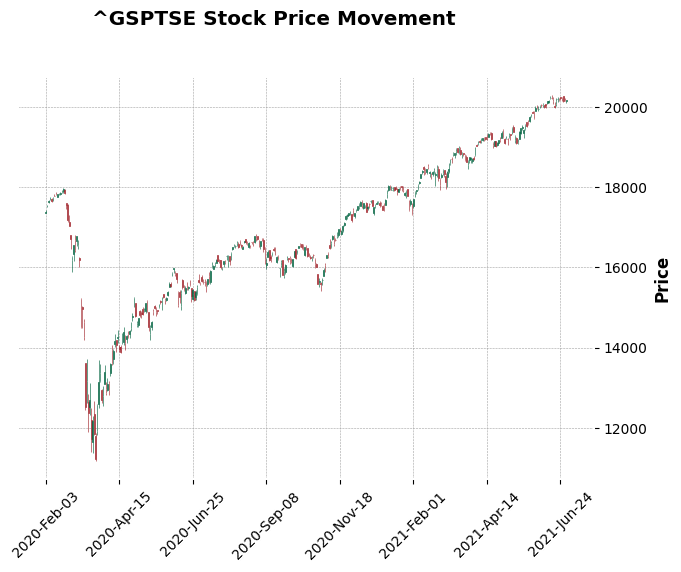

In [78]:
# Ensure 'Date' is in datetime format for stock_data
stock_data.index = pd.to_datetime(stock_data.index)

# Select the stock data for ^GSPTSE
stock_data_gsptse = stock_data[stock_data['Symbol'] == '^GSPTSE']

# Create a DataFrame that contains only the necessary columns for the candlestick chart
gsptse_candlestick_data = stock_data_gsptse[['Open', 'High', 'Low', 'Close']]

# Create a candlestick chart using mplfinance
mpf.plot(gsptse_candlestick_data, type='candle', style='charles', title='^GSPTSE Stock Price Movement', ylabel='Price')